In [1]:
#importing local classes
import DataParser
#importing libraries
import os
import pandas as pd
import librosa
import librosa.display as librosa_display
import matplotlib.pyplot as plt
import contextlib
import wave
#%matplotlib inline

In [2]:
import DataProvider
prov = DataProvider.DataProvider()

reading helper data on path: ./Data/Helper/backGround_street.wav
reading helper data on path: ./Data/Helper/backGround_noice.wav
reading helper data on path: ./Data/Helper/backGround_nature.wav
[new value of  47
--new value of  61
---------new value of  70
----------------new value of  79
-----new value of  81
----------------------new value of  82
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------new value of  88
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------new value of  90
-----------------------------------------new value of  93
-----------

In [3]:
import DataParser
parser = DataParser.DataParser()
sampling_rate = 16000

In [4]:
import VAD
vad = VAD.VAD()

In [21]:
data_path = parser.return_data_path_on_coordinates(True, 1,3)
data_path

'./Data/Train/1/lasha-andg-1b.wav'

In [22]:
prov.isTrain = True
data_numpy, sampling_rate = librosa.load(data_path, sr=sampling_rate)
data_numpy_no_silence = vad.remove_silences(data_numpy, 0.01)
numpy_datas = prov.__add_background_voice__(data_numpy_no_silence)

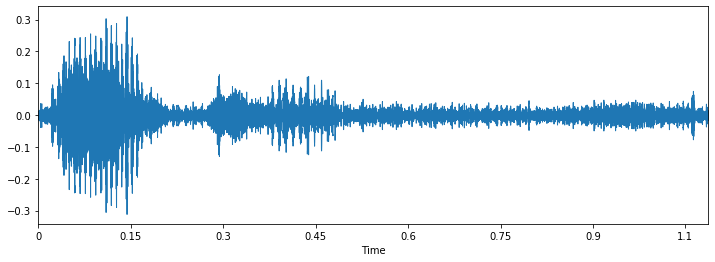

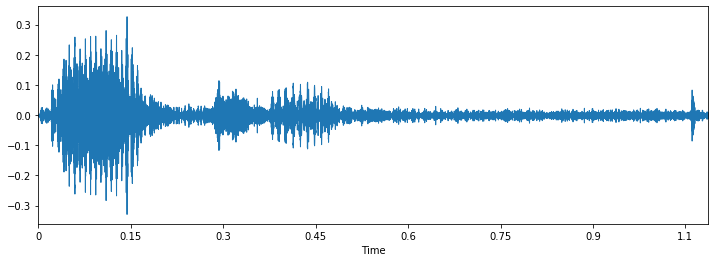

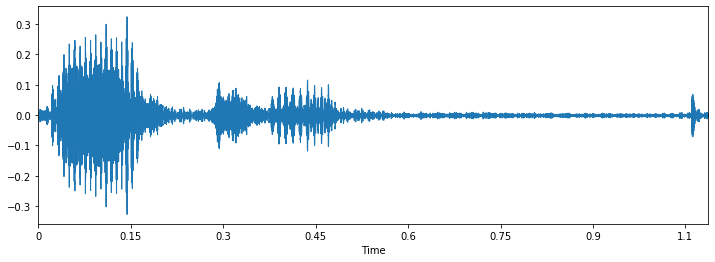

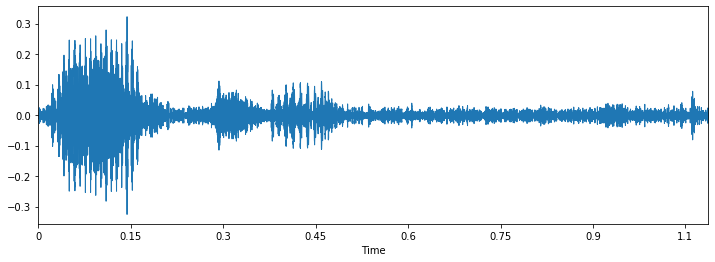

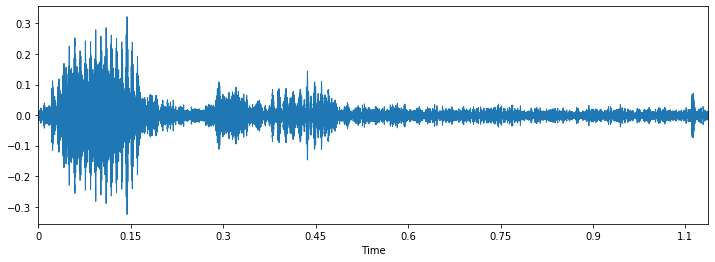

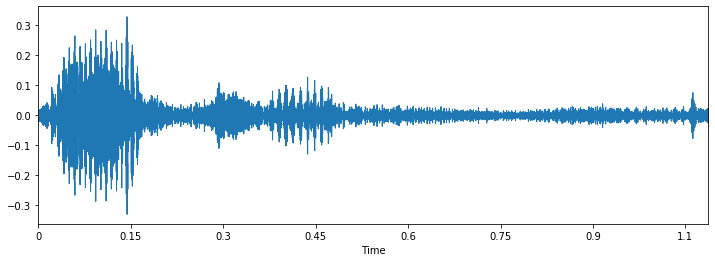

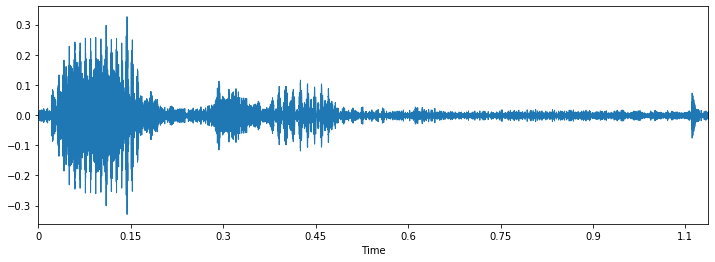

In [23]:
for numpy_data in numpy_datas:
    plt.figure(figsize=(12, 4))
    librosa_display.waveplot(numpy_data, sr=sampling_rate)

In [24]:
import IPython.display as ipd
for numpy_data in numpy_datas:
    display(ipd.Audio(numpy_data, rate=sampling_rate))

In [20]:
import numpy as np
from scipy import signal
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

In [10]:
freqs, times, spectrogram = log_specgram(random_file_data_numpy_no_silence, sampling_rate)

NameError: name 'random_file_data_numpy_no_silence' is not defined

In [ ]:
print(spectrogram)

In [ ]:
fig = plt.figure(figsize=(14, 8))
#ax1 = fig.add_subplot(211)
#ax1.set_title('Raw wave of ')
#ax1.set_ylabel('Amplitude')
#ax1.plot(np.linspace(0, sampling_rate/len(random_file_data_numpy_no_silence), sampling_rate), random_file_data_numpy_no_silence)

ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Spectrogram of ')
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')

In [ ]:
mean = np.mean(spectrogram, axis=0)
std = np.std(spectrogram, axis=0)
spectrogram = (spectrogram - mean) / std

In [ ]:
print(spectrogram.shape)